---
# US Stores Sales-Project
---



In [1]:
import pandas as pd
import numpy as np 
import datetime as dt
import seaborn as sas
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs , init_notebook_mode ,plot ,iplot 
init_notebook_mode(connected=True)
sas.set()

In [2]:
sales = pd.read_csv('H:/PYTHON/python for data science/s11-project/sales/sales.csv', parse_dates=['Date'])

---
## ASK
---

__1-How many states ?__

__2-How many markerts ?__

__3-How many market for each state ?__

__4-What is the market size for each state ?__

__5-What is the largest states have profit ?__

__6-What is the lowest states have profit ?__

__7-How many markets that have profit above average of profit ?__

__8-Dose the market size affect profit ?__

__9-Dose the margin related to profit ?__

__10-Dose the cost related to inventory ?__

__11-Dose the total expenses realted to marketing ?__

__12-Who are the states that achieved the Expected Profit ?__

__13-How many products took greater than Budget COGS ?__

__14-How many products ?__

__15-What is the most common products ?__

__16-How many product types ?__

__17-Which are the most products that have profit ?__

__18-Which are the lowest products that have profit ?__

__19-Is there particular product that has high profit in a specific states ?__

__20-Is there particular product depends on market size ?__

__21-What is the total of profit for each year, quarter ?__

__22-What is the total of profit for each month, day name ?__

__23-What is the total and the average of profit for each days ?__

__24-Is there particular product that has high profit in a specific month or days ?__

__25-What are the worst stores that haven't achieved any profit as long a year ?__

---
## Preprocessing and Cleaning
---

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area Code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market Size     4248 non-null   object        
 4   Profit          4248 non-null   float64       
 5   Margin          4248 non-null   float64       
 6   Sales           4248 non-null   float64       
 7   COGS            4248 non-null   float64       
 8   Total Expenses  4248 non-null   float64       
 9   Marketing       4248 non-null   float64       
 10  Inventory       4248 non-null   float64       
 11  Budget Profit   4248 non-null   float64       
 12  Budget COGS     4248 non-null   float64       
 13  Budget Margin   4248 non-null   float64       
 14  Budget Sales    4248 non-null   float64       
 15  Prod

In [4]:
sales.isna().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [5]:
sales.columns = sales.columns.str.replace(' ','_')

In [6]:
sales = sales.convert_dtypes()

In [7]:
sales.Area_Code = sales.Area_Code.astype('string')

In [8]:
sales.dtypes

Area_Code                 string
State                     string
Market                    string
Market_Size               string
Profit                     Int64
Margin                     Int64
Sales                      Int64
COGS                       Int64
Total_Expenses             Int64
Marketing                  Int64
Inventory                  Int64
Budget_Profit              Int64
Budget_COGS                Int64
Budget_Margin              Int64
Budget_Sales               Int64
ProductId                  Int64
Date              datetime64[ns]
Product_Type              string
Product                   string
Type                      string
dtype: object

In [9]:
sales['year'] = sales.Date.dt.year
sales['quarter'] = sales.Date.dt.quarter
sales['month'] = sales.Date.dt.month_name()
sales['day_name'] = sales.Date.dt.day_name()
sales['days'] = sales.Date.dt.day


<AxesSubplot:>

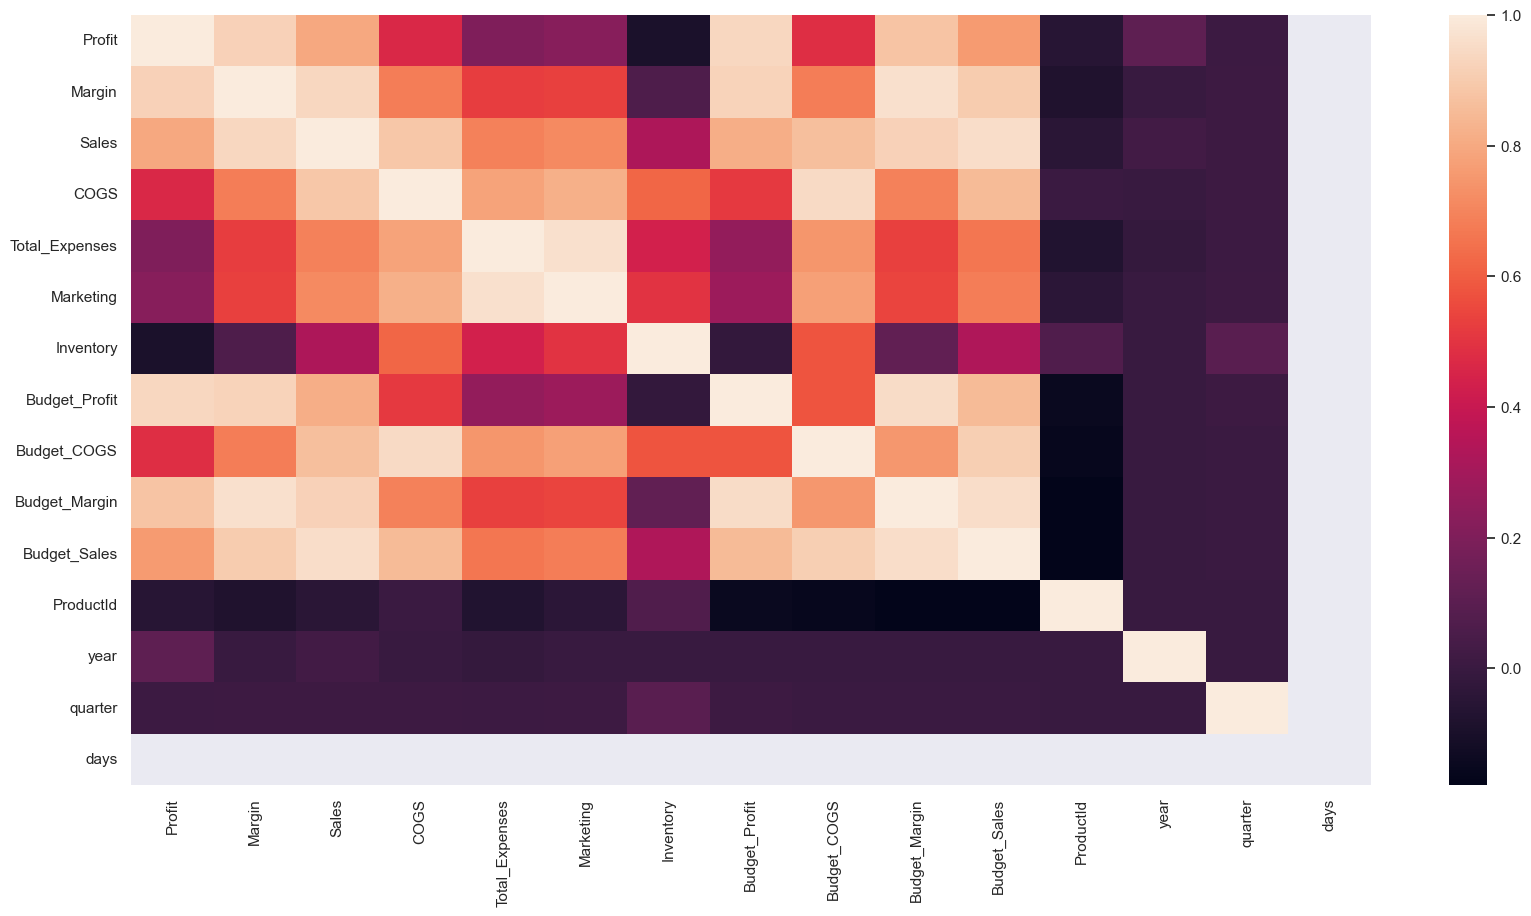

In [10]:
plt.figure(figsize=(20,10))
sas.heatmap(sales.corr())

In [11]:
sales.describe(include=('string'))

,Area_Code,State,Market,Market_Size,Product_Type,Product,Type
count,4248,4248,4248,4248,4248,4248,4248
unique,156,20,4,2,4,13,2
top,435,Utah,West,Small Market,Espresso,Columbian,Regular
freq,215,288,1344,2544,1176,480,2400


---
## Analysis and Visualization
---

__1-How many states ?__

In [12]:
q_1 = sales.State.nunique()
q_1

20

__2-How many markerts ?__

In [13]:
q_2 = sales.Area_Code.nunique()
q_2

156

__3-How many market for each state ?__

In [14]:
q_3 = sales.groupby(['Area_Code','State']).agg(number_of_markets = ('Market','count')).reset_index()
q_3

,Area_Code,State,number_of_markets
0,203,Connecticut,50
1,206,Washington,80
2,209,California,16
3,210,Texas,6
4,212,New York,12
...,...,...,...
151,971,Oregon,87
152,972,Texas,5
153,978,Massachusetts,17
154,979,Texas,5


In [15]:
px.density_heatmap(q_3 ,
x = 'Area_Code' , 
y = 'State', 
z = 'number_of_markets' ,
color_continuous_scale= 'Greys' ,
hover_name='number_of_markets' ,
title='Total number of stores for each state.')

__4-What is the market size for each state ?__

In [16]:
q_4 = sales.pivot_table(index=['Area_Code','State'] ,columns='Market_Size' , aggfunc='count' , values='Market' ,fill_value=0 , margins=True , margins_name='Total').reset_index()
q_4.columns.name = ' '
q_4

,Area_Code,State,Major Market,Small Market,Total
0,203,Connecticut,0,50,50
1,206,Washington,0,80,80
2,209,California,16,0,16
3,210,Texas,6,0,6
4,212,New York,12,0,12
...,...,...,...,...,...
152,972,Texas,5,0,5
153,978,Massachusetts,17,0,17
154,979,Texas,5,0,5
155,985,Louisiana,0,30,30


In [17]:
px.scatter(q_4.iloc[:-1,:] ,
x = 'Major Market' ,
y = 'Small Market' ,
color='State',
size='Total',
hover_name='Area_Code',
template='none',
title='Total number of stores for each state by market size.'
)

__5-What is the largest states have profit ?__

In [18]:
q_5 = sales.groupby(['Area_Code','State']).agg(Total_profit = ('Profit','sum')).reset_index()
q_5

,Area_Code,State,Total_profit
0,203,Connecticut,2274
1,206,Washington,3823
2,209,California,1840
3,210,Texas,695
4,212,New York,609
...,...,...,...
151,971,Oregon,4052
152,972,Texas,853
153,978,Massachusetts,2261
154,979,Texas,598


In [19]:
px.bar(q_5 ,
x = 'Area_Code' , 
y = 'Total_profit' ,
color='State',
template='seaborn',
title='Total profit by state.',
)

__6-What is the lowest states have profit ?__

In [20]:
q_6 = sales.groupby(['Area_Code','State']).agg(Total_profit = ('Profit','sum')).nsmallest(50 , columns='Total_profit').reset_index()
q_6

,Area_Code,State,Total_profit
0,914,New York,-154
1,925,California,-153
2,909,California,-140
3,845,New York,-36
4,417,Missouri,155
5,816,Missouri,210
6,903,Texas,280
7,858,California,330
8,408,California,385
9,713,Texas,391


In [21]:
px.bar(q_6 ,
y = 'Area_Code' , 
x = 'Total_profit' ,
title='lowest profit by state.',
color='State',
pattern_shape='State',
base='Total_profit',
hover_name='Total_profit',
template='plotly_dark',
color_discrete_sequence=px.colors.qualitative.Bold_r
)

__7-How many markets that have profit above average of profit ?__

In [22]:
sales.Profit.describe()

count    4248.000000
mean       61.097693
std       101.708546
min      -638.000000
25%        17.000000
50%        40.000000
75%        92.000000
max       778.000000
Name: Profit, dtype: float64

In [23]:
q_7 = sales[sales.Profit >= sales.Profit.mean()]
q_7.Area_Code.nunique()

152

__8-Dose the market size affect profit ?__

In [24]:
q_8 = sales[sales.Market_Size == 'Major Market']['Profit'].sum() > sales[sales.Market_Size == '	Small Market']['Profit'].sum()
q_8

True

__9-Dose the margin related to profit ?__

In [25]:
px.scatter(sales , x ='Margin' , y = 'Profit',color='Profit' , title='Margin Vs Profit')

__10-Dose the cost related to inventory ?__

In [26]:
px.scatter(sales , x ='COGS' , y = 'Inventory',color='Profit' , title='COGS Vs Inventory by Profit.' ,color_continuous_scale='tealrose',template='none')

__11-Dose the total expenses realted to marketing ?__

In [27]:
px.scatter(sales , x ='Total_Expenses' , y = 'Marketing',color='Profit' , title='Total Expenses Vs Marketing by Profit.' ,color_continuous_scale='viridis',template='plotly_white')

__12-Who are the states that achieved the Expected Profit ?__

In [28]:
q_12 = sales[sales.Profit >= sales.Budget_Profit][['Area_Code','State','Profit','Budget_Profit']]
q_12

,Area_Code,State,Profit,Budget_Profit
4,203,Connecticut,104,90
5,203,Connecticut,104,90
6,203,Connecticut,135,110
7,203,Connecticut,171,130
8,203,Connecticut,181,130
...,...,...,...,...
4238,985,Louisiana,62,40
4239,985,Louisiana,43,40
4240,985,Louisiana,37,30
4241,985,Louisiana,1,0


In [29]:
px.scatter_matrix(q_12 , color='State' , hover_name='Area_Code')

In [30]:
sales.columns

Index(['Area_Code', 'State', 'Market', 'Market_Size', 'Profit', 'Margin',
       'Sales', 'COGS', 'Total_Expenses', 'Marketing', 'Inventory',
       'Budget_Profit', 'Budget_COGS', 'Budget_Margin', 'Budget_Sales',
       'ProductId', 'Date', 'Product_Type', 'Product', 'Type', 'year',
       'quarter', 'month', 'day_name', 'days'],
      dtype='object')

__13-How many products took greater than Budget COGS ?__

In [31]:
q_13 = sales[sales.COGS >= sales.Budget_COGS][['Area_Code','State','Profit','Budget_Profit']]
q_13

,Area_Code,State,Profit,Budget_Profit
0,203,Connecticut,107,110
1,203,Connecticut,75,90
2,203,Connecticut,122,130
3,203,Connecticut,105,110
4,203,Connecticut,104,90
...,...,...,...,...
4243,985,Louisiana,-6,0
4244,985,Louisiana,-7,10
4245,985,Louisiana,-3,0
4246,985,Louisiana,1,0


__14-How many products ?__

In [32]:
q_14 = sales.Product.nunique()
q_14

13

__15-What is the most common products ?__

In [43]:
q_15 =pd.DataFrame(sales.Product.value_counts()).reset_index().rename(columns={'index':'product','Product':'number_of_product'})
q_15

,product,number_of_product
0,Columbian,480
1,Caffe Mocha,480
2,Lemon,480
3,Decaf Espresso,408
4,Darjeeling,384
5,Decaf Irish Cream,384
6,Chamomile,384
7,Green Tea,288
8,Earl Grey,288
9,Caffe Latte,216


In [44]:
px.pie(q_15 ,
values='number_of_product',
names='product',
color='product',
title='Most common products.')

__16-How many product types ?__

In [46]:
q_16=sales.Type.value_counts()
q_16

Regular    2400
Decaf      1848
Name: Type, dtype: Int64

__17-Which are the most products that have profit ?__

In [49]:
q_17 = sales.groupby('Product').agg(Total_profit = ('Profit' ,'sum')).reset_index()
q_17

,Product,Total_profit
0,Amaretto,4890
1,Caffe Latte,11375
2,Caffe Mocha,17678
3,Chamomile,27231
4,Columbian,55804
5,Darjeeling,29053
6,Decaf Espresso,29502
7,Decaf Irish Cream,13989
8,Earl Grey,24164
9,Green Tea,-231


In [52]:
px.bar(q_17 , 
x = 'Product' ,
y = 'Total_profit' , 
color='Total_profit',
template='seaborn',
text='Total_profit',
title='Total Profit for each Product.')

__18-Which are the lowest products that have profit ?__

In [54]:
q_18 = sales.groupby(['Product_Type','Type']).agg(Total_profit = ('Profit' ,'sum')).reset_index()
q_18

,Product_Type,Type,Total_profit
0,Coffee,Decaf,13989
1,Coffee,Regular,60694
2,Espresso,Decaf,29502
3,Espresso,Regular,39118
4,Herbal Tea,Decaf,63254
5,Tea,Regular,52986


In [60]:
px.sunburst(q_18 , path=['Product_Type','Type'] , values='Total_profit' )

__19-Is there particular product that has high profit in a specific states ?__

In [64]:
q_19 = sales.groupby(['State','Product']).agg(Total_profit = ('Profit' ,'sum')).sort_values(by='Total_profit' , ascending=False).reset_index()
q_19

,State,Product,Total_profit
0,Massachusetts,Columbian,12489
1,California,Columbian,8566
2,New York,Columbian,8565
3,New York,Regular Espresso,7589
4,Nevada,Darjeeling,6580
...,...,...,...
172,California,Amaretto,-2217
173,California,Decaf Irish Cream,-3891
174,New York,Mint,-4780
175,New York,Caffe Mocha,-6354


In [74]:
px.scatter_3d(q_19 , 
              x = 'State' , 
              y = 'Product' ,
              z = 'Total_profit' ,
              color ='State' , 
              opacity = 0.7, 
              template='plotly_dark')

__20-Is there particular product depends on market size ?__

In [75]:
q_20 = sales.groupby(['Market_Size','Product']).agg(Total_profit = ('Profit' ,'sum')).sort_values(by='Total_profit' , ascending=False).reset_index()
q_20

,Market_Size,Product,Total_profit
0,Major Market,Columbian,44131
1,Major Market,Decaf Espresso,16865
2,Small Market,Chamomile,15831
3,Small Market,Darjeeling,15729
4,Major Market,Lemon,15370
5,Small Market,Lemon,14499
6,Small Market,Earl Grey,13508
7,Major Market,Darjeeling,13324
8,Small Market,Decaf Espresso,12637
9,Small Market,Columbian,11673


In [78]:
px.scatter(q_20 , x = 'Product' , y = 'Total_profit' , facet_col='Market_Size' , color='Total_profit' , template='none')

__21-What is the total of profit for each year, quarter ?__

In [79]:
px.pie(sales , values='Profit' , names='year')

__22-What is the total of profit for each month, day name ?__

In [83]:
px.bar(sales , x = 'day_name' , y = 'Profit' , color='Profit' , template='plotly_white')

__23-What is the total and the average of profit for each days ?__

In [88]:
q_23 = sales.groupby('days').agg(total_profit = ('Profit','sum')).reset_index()
q_23

,days,total_profit
0,1,259543


__24-Is there particular product that has high profit in a specific month or days ?__

In [149]:
q_24 = sales.pivot_table(index='Product' , columns='month' , values='Profit' , aggfunc='sum' ).reset_index()
q_24.columns.name = ' '
q_24

,Product,April,August,December,February,January,July,June,March,May,November,October,September
0,Amaretto,378,271,430,497,557,236,334,435,365,478,444,465
1,Caffe Latte,1007,879,953,962,935,1038,963,996,1002,891,872,877
2,Caffe Mocha,1369,1599,1476,1445,1415,1399,1431,1393,1388,1555,1656,1552
3,Chamomile,2217,2381,2273,2241,2294,2242,2225,2226,2131,2309,2424,2268
4,Columbian,4454,5506,4588,4139,4375,5474,5215,4272,4542,4104,4240,4895
5,Darjeeling,2345,2674,2305,2357,2391,2551,2521,2371,2369,2204,2467,2498
6,Decaf Espresso,2498,2564,2340,2477,2443,2566,2485,2511,2452,2284,2415,2467
7,Decaf Irish Cream,1234,1233,1128,1149,1092,1405,1256,1165,1211,1000,1073,1043
8,Earl Grey,1984,2114,2106,1908,1903,2124,2092,1916,2007,1878,1991,2141
9,Green Tea,-4,-36,-55,5,-131,34,13,9,-17,102,42,-193


Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name=' ')

In [156]:
px.line(q_24 , x = 'Product' , y = q_24.columns[1:])

__25-What are the worst stores that haven't achieved any profit as long a year ?__

In [158]:
q_25 = sales.pivot_table(index=['Area_Code','State'] , columns='quarter' , values='Profit' , aggfunc='sum' ,fill_value=0).reset_index()
q_25.columns.name = ' '
q_25

,Area_Code,State,1,2,3,4
0,203,Connecticut,283,369,678,944
1,206,Washington,1254,1221,569,779
2,209,California,145,747,349,599
3,210,Texas,0,192,322,181
4,212,New York,84,89,14,422
...,...,...,...,...,...,...
151,971,Oregon,1269,873,540,1370
152,972,Texas,248,0,284,321
153,978,Massachusetts,609,434,808,410
154,979,Texas,80,28,490,0


In [165]:
px.line(q_25 ,
x = 'Area_Code' ,
y = q_25.columns[2:],
color='State',
title='Total Profit for each Quarter by state and stores')